In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

I will be exploring the files to see layout, if there are null values, duplicates or other issues that may exist within the data.

TEST DATA FILE EXPLORATION:

In [2]:
test = pd.read_csv('test.csv')
test.head()

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


In [3]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Id                      116293 non-null  int64  
 1   Date                    116293 non-null  object 
 2   Address                 116293 non-null  object 
 3   Species                 116293 non-null  object 
 4   Block                   116293 non-null  int64  
 5   Street                  116293 non-null  object 
 6   Trap                    116293 non-null  object 
 7   AddressNumberAndStreet  116293 non-null  object 
 8   Latitude                116293 non-null  float64
 9   Longitude               116293 non-null  float64
 10  AddressAccuracy         116293 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 9.8+ MB


Analysis: There are no null values in this dataset. 
Observation: Perhaps the Date column needs to be converted from dtype object to dtype datetime.

C:\Users\mayra\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


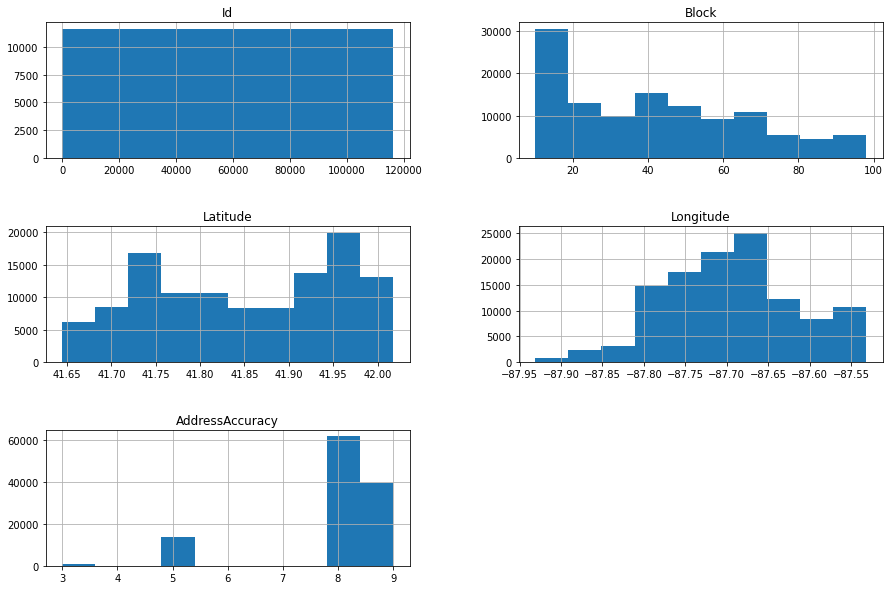

In [4]:
test.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

In [5]:
test.duplicated().value_counts()

False    116293
dtype: int64

There were no duplicated values in the dataset.

In [6]:
test.groupby('AddressAccuracy').count()

#Do we want to drop low accuracy rows, for example, AddressAccruacy = 3?

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude
AddressAccuracy,,,,,,,,,,
3,764,764,764,764,764,764,764,764,764,764
5,13761,13761,13761,13761,13761,13761,13761,13761,13761,13761
8,61973,61973,61973,61973,61973,61973,61973,61973,61973,61973
9,39795,39795,39795,39795,39795,39795,39795,39795,39795,39795


In [7]:
test.groupby('AddressAccuracy')['Id'].count()

AddressAccuracy
3      764
5    13761
8    61973
9    39795
Name: Id, dtype: int64

In [8]:
percent = 764/(764+13761+61973+39795)
print(percent*100,'%')

#AddressAccuracy = 3 makes up less than 1% of the data, it would be okay to drop it

0.6569612960367348 %


In [9]:
for i in test['Trap']:
    if len(i) <= 4:
        test['Satelite_Trap'] = 'No'
    else:
        test['Satelite_Trap'] = 'Yes'



In [10]:
test['Satelite_Trap'].nunique()

1

In [11]:
for i in test['Trap']:
    if len(i) > 4:
        print(i)

T090A
T090A
T090A
T090A
T090A
T090A
T090A
T090A
T090B
T090B
T090B
T090B
T090B
T090B
T090B
T090B
T090C
T090C
T090C
T090C
T090C
T090C
T090C
T090C
T200A
T200A
T200A
T200A
T200A
T200A
T200A
T200A
T128A
T128A
T128A
T128A
T128A
T128A
T128A
T128A
T200B
T200B
T200B
T200B
T200B
T200B
T200B
T200B
T218A
T218A
T218A
T218A
T218A
T218A
T218A
T218A
T218C
T218C
T218C
T218C
T218C
T218C
T218C
T218C
T218B
T218B
T218B
T218B
T218B
T218B
T218B
T218B
T002A
T002A
T002A
T002A
T002A
T002A
T002A
T002A
T002B
T002B
T002B
T002B
T002B
T002B
T002B
T002B
T065A
T065A
T065A
T065A
T065A
T065A
T065A
T065A
T094B
T094B
T094B
T094B
T094B
T094B
T094B
T094B
T054C
T054C
T054C
T054C
T054C
T054C
T054C
T054C
T090A
T090A
T090A
T090A
T090A
T090A
T090A
T090A
T090B
T090B
T090B
T090B
T090B
T090B
T090B
T090B
T090C
T090C
T090C
T090C
T090C
T090C
T090C
T090C
T200A
T200A
T200A
T200A
T200A
T200A
T200A
T200A
T128A
T128A
T128A
T128A
T128A
T128A
T128A
T128A
T200B
T200B
T200B
T200B
T200B
T200B
T200B
T200B
T218A
T218A
T218A
T218A
T218A
T218A
T218

T054C
T054C
T054C
T054C
T054C
T054C
T054C
T090A
T090A
T090A
T090A
T090A
T090A
T090A
T090A
T090B
T090B
T090B
T090B
T090B
T090B
T090B
T090B
T090C
T090C
T090C
T090C
T090C
T090C
T090C
T090C
T200A
T200A
T200A
T200A
T200A
T200A
T200A
T200A
T128A
T128A
T128A
T128A
T128A
T128A
T128A
T128A
T200B
T200B
T200B
T200B
T200B
T200B
T200B
T200B
T218A
T218A
T218A
T218A
T218A
T218A
T218A
T218A
T218C
T218C
T218C
T218C
T218C
T218C
T218C
T218C
T218B
T218B
T218B
T218B
T218B
T218B
T218B
T218B
T002A
T002A
T002A
T002A
T002A
T002A
T002A
T002A
T002B
T002B
T002B
T002B
T002B
T002B
T002B
T002B
T065A
T065A
T065A
T065A
T065A
T065A
T065A
T065A
T094B
T094B
T094B
T094B
T094B
T094B
T094B
T094B
T054C
T054C
T054C
T054C
T054C
T054C
T054C
T054C
T090A
T090A
T090A
T090A
T090A
T090A
T090A
T090A
T090B
T090B
T090B
T090B
T090B
T090B
T090B
T090B
T090C
T090C
T090C
T090C
T090C
T090C
T090C
T090C
T200A
T200A
T200A
T200A
T200A
T200A
T200A
T200A
T128A
T128A
T128A
T128A
T128A
T128A
T128A
T128A
T200B
T200B
T200B
T200B
T200B
T200B
T200B
T200

T002B
T002B
T002B
T002B
T002B
T065A
T065A
T065A
T065A
T065A
T065A
T065A
T065A
T094B
T094B
T094B
T094B
T094B
T094B
T094B
T094B
T054C
T054C
T054C
T054C
T054C
T054C
T054C
T054C
T090A
T090A
T090A
T090A
T090A
T090A
T090A
T090A
T090B
T090B
T090B
T090B
T090B
T090B
T090B
T090B
T090C
T090C
T090C
T090C
T090C
T090C
T090C
T090C
T200A
T200A
T200A
T200A
T200A
T200A
T200A
T200A
T128A
T128A
T128A
T128A
T128A
T128A
T128A
T128A
T200B
T200B
T200B
T200B
T200B
T200B
T200B
T200B
T218A
T218A
T218A
T218A
T218A
T218A
T218A
T218A
T218C
T218C
T218C
T218C
T218C
T218C
T218C
T218C
T218B
T218B
T218B
T218B
T218B
T218B
T218B
T218B
T002A
T002A
T002A
T002A
T002A
T002A
T002A
T002A
T002B
T002B
T002B
T002B
T002B
T002B
T002B
T002B
T065A
T065A
T065A
T065A
T065A
T065A
T065A
T065A
T094B
T094B
T094B
T094B
T094B
T094B
T094B
T094B
T054C
T054C
T054C
T054C
T054C
T054C
T054C
T054C
T090A
T090A
T090A
T090A
T090A
T090A
T090A
T090A
T090B
T090B
T090B
T090B
T090B
T090B
T090B
T090B
T090C
T090C
T090C
T090C
T090C
T090C
T090C
T090C
T200A
T200

T002A
T002A
T002A
T002A
T002B
T002B
T002B
T002B
T002B
T002B
T002B
T002B
T065A
T065A
T065A
T065A
T065A
T065A
T065A
T065A
T094B
T094B
T094B
T094B
T094B
T094B
T094B
T094B
T054C
T054C
T054C
T054C
T054C
T054C
T054C
T054C
T090A
T090A
T090A
T090A
T090A
T090A
T090A
T090A
T090B
T090B
T090B
T090B
T090B
T090B
T090B
T090B
T090C
T090C
T090C
T090C
T090C
T090C
T090C
T090C
T200A
T200A
T200A
T200A
T200A
T200A
T200A
T200A
T128A
T128A
T128A
T128A
T128A
T128A
T128A
T128A
T200B
T200B
T200B
T200B
T200B
T200B
T200B
T200B
T218A
T218A
T218A
T218A
T218A
T218A
T218A
T218A
T218C
T218C
T218C
T218C
T218C
T218C
T218C
T218C
T218B
T218B
T218B
T218B
T218B
T218B
T218B
T218B
T002A
T002A
T002A
T002A
T002A
T002A
T002A
T002A
T002B
T002B
T002B
T002B
T002B
T002B
T002B
T002B
T065A
T065A
T065A
T065A
T065A
T065A
T065A
T065A
T094B
T094B
T094B
T094B
T094B
T094B
T094B
T094B
T054C
T054C
T054C
T054C
T054C
T054C
T054C
T054C
T090A
T090A
T090A
T090A
T090A
T090A
T090A
T090A
T090B
T090B
T090B
T090B
T090B
T090B
T090B
T090B
T090C
T090C
T090

T200B
T200B
T200B
T200B
T200B
T200B
T218A
T218A
T218A
T218A
T218A
T218A
T218A
T218A
T218C
T218C
T218C
T218C
T218C
T218C
T218C
T218C
T218B
T218B
T218B
T218B
T218B
T218B
T218B
T218B
T002A
T002A
T002A
T002A
T002A
T002A
T002A
T002A
T002B
T002B
T002B
T002B
T002B
T002B
T002B
T002B
T065A
T065A
T065A
T065A
T065A
T065A
T065A
T065A
T094B
T094B
T094B
T094B
T094B
T094B
T094B
T094B
T054C
T054C
T054C
T054C
T054C
T054C
T054C
T054C
T090A
T090A
T090A
T090A
T090A
T090A
T090A
T090A
T090B
T090B
T090B
T090B
T090B
T090B
T090B
T090B
T090C
T090C
T090C
T090C
T090C
T090C
T090C
T090C
T200A
T200A
T200A
T200A
T200A
T200A
T200A
T200A
T128A
T128A
T128A
T128A
T128A
T128A
T128A
T128A
T200B
T200B
T200B
T200B
T200B
T200B
T200B
T200B
T218A
T218A
T218A
T218A
T218A
T218A
T218A
T218A
T218C
T218C
T218C
T218C
T218C
T218C
T218C
T218C
T218B
T218B
T218B
T218B
T218B
T218B
T218B
T218B
T002A
T002A
T002A
T002A
T002A
T002A
T002A
T002A
T002B
T002B
T002B
T002B
T002B
T002B
T002B
T002B
T065A
T065A
T065A
T065A
T065A
T065A
T065A
T065A
T094

T200A
T200A
T200A
T200A
T200A
T200A
T200A
T128A
T128A
T128A
T128A
T128A
T128A
T128A
T128A
T200B
T200B
T200B
T200B
T200B
T200B
T200B
T200B
T218A
T218A
T218A
T218A
T218A
T218A
T218A
T218A
T218C
T218C
T218C
T218C
T218C
T218C
T218C
T218C
T218B
T218B
T218B
T218B
T218B
T218B
T218B
T218B
T002A
T002A
T002A
T002A
T002A
T002A
T002A
T002A
T002B
T002B
T002B
T002B
T002B
T002B
T002B
T002B
T065A
T065A
T065A
T065A
T065A
T065A
T065A
T065A
T094B
T094B
T094B
T094B
T094B
T094B
T094B
T094B
T054C
T054C
T054C
T054C
T054C
T054C
T054C
T054C
T090A
T090A
T090A
T090A
T090A
T090A
T090A
T090A
T090B
T090B
T090B
T090B
T090B
T090B
T090B
T090B
T090C
T090C
T090C
T090C
T090C
T090C
T090C
T090C
T200A
T200A
T200A
T200A
T200A
T200A
T200A
T200A
T128A
T128A
T128A
T128A
T128A
T128A
T128A
T128A
T200B
T200B
T200B
T200B
T200B
T200B
T200B
T200B
T218A
T218A
T218A
T218A
T218A
T218A
T218A
T218A
T218C
T218C
T218C
T218C
T218C
T218C
T218C
T218C
T218B
T218B
T218B
T218B
T218B
T218B
T218B
T218B
T002A
T002A
T002A
T002A
T002A
T002A
T002A
T002

In [12]:
test.head()

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,Satelite_Trap
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,Yes
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,Yes
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,Yes
3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,Yes
4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,Yes


Summary of analysis on Test data file:
There were no duplicates in the data. There are a few rows where the AddressAccuracy has a low accuracy rate of 3, which makes up less than 1% of the entire data. This data could be dropped. 

Also, I tried to add a column to indicate if it was a satelite or not, but my for loop did not work. Also, the runtime is about 3 minutes, so I know there is a more efficient way. Per the Kaggle data overview, if the Trap code ends in a letter, then it is a Satelite. Since all of the others were in a 'XXXX' format, I thought I could label those with string length greater than 4 as 'Yes'. However, that did not work per above analysis (labeled as 'Yes' for those with 'XXXX'format...and the .nunique() function.

SPRAY DATA FILE EXPLORATION:

In [13]:
spray = pd.read_csv('spray.csv')
spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       14835 non-null  object 
 1   Time       14251 non-null  object 
 2   Latitude   14835 non-null  float64
 3   Longitude  14835 non-null  float64
dtypes: float64(2), object(2)
memory usage: 463.7+ KB


In [14]:
missing = pd.concat([spray.isnull().sum(), 100 * spray.isnull().mean()], axis=1)
header = missing.columns=['count', '%']
missing.sort_values(by=header, ascending=False)
#There are 584 missing values for time, which makes up 4% of the data.

,count,%
Time,584,3.936636
Date,0,0.000000
Latitude,0,0.000000
Longitude,0,0.000000


In [15]:
spray['Time'].sort_values().isnull()

8512     False
6731     False
11272    False
4702     False
11904    False
         ...  
1609      True
1610      True
1611      True
1612      True
1613      True
Name: Time, Length: 14835, dtype: bool

In [16]:
spray.iloc[1590:1613]

,Date,Time,Latitude,Longitude
1590,2011-09-07,NaN,41.992612,-87.813343
1591,2011-09-07,NaN,41.992660,-87.812767
1592,2011-09-07,NaN,41.992660,-87.812191
1593,2011-09-07,NaN,41.992612,-87.811663
1594,2011-09-07,NaN,41.992660,-87.811279
1595,2011-09-07,NaN,41.992660,-87.810847
1596,2011-09-07,NaN,41.992612,-87.810415
1597,2011-09-07,NaN,41.992660,-87.809455
1598,2011-09-07,NaN,41.992660,-87.809983
1599,2011-09-07,NaN,41.992708,-87.808927


Analysis: The Time Column had a few null values. Performed analysis to see what percent of the data was null. Only 4% of the data contained null values. It looks like all values are related to 2011-09-07. 

Observation: Perhaps we could concatenate the date and time columns to form a datetime datatype. 

In [17]:
spray['Date_Time'] = spray['Date'] + " " + spray['Time']
spray.head()

,Date,Time,Latitude,Longitude,Date_Time
0,2011-08-29,6:56:58 PM,42.391623,-88.089163,2011-08-29 6:56:58 PM
1,2011-08-29,6:57:08 PM,42.391348,-88.089163,2011-08-29 6:57:08 PM
2,2011-08-29,6:57:18 PM,42.391022,-88.089157,2011-08-29 6:57:18 PM
3,2011-08-29,6:57:28 PM,42.390637,-88.089158,2011-08-29 6:57:28 PM
4,2011-08-29,6:57:38 PM,42.390410,-88.088858,2011-08-29 6:57:38 PM


In [18]:
spray['Date_Time'].value_counts().head(10)

2011-09-07 7:44:32 PM     541
2013-07-17 8:27:17 PM       2
2013-08-29 9:44:23 PM       2
2013-08-08 9:13:05 PM       2
2013-07-17 9:28:47 PM       2
2013-07-17 8:21:31 PM       2
2013-08-08 10:14:15 PM      2
2013-08-29 8:34:13 PM       2
2013-07-17 8:18:57 PM       2
2013-07-17 8:39:31 PM       2
Name: Date_Time, dtype: int64

Further analyzing the data to see if there are any anomalies. There are 541 rows that appear to be related to the same date as mentioned for the missing values (2011-09-07). Something funny is happening with this day. Could be related. However, in this case they appear to be duplicates.

In [19]:
spray['Lat_Lon'] = spray['Latitude'].astype(str) + ','+ spray['Longitude'].astype(str)
spray.head()
spray['Lat_Lon'].value_counts().sort_values(ascending=False).head(10)

41.98646,-87.794225                      541
41.9839166666667,-87.7930883333333         2
42.006198333333295,-87.7669816666667       1
41.9608166666667,-87.7204483333333         1
41.941556666666706,-87.7372216666667       1
41.727748333333295,-87.58811999999999      1
42.004566666666705,-87.80960999999999      1
41.761235,-87.7122016666667                1
41.73004833333329,-87.66535999999999       1
41.9850816666667,-87.6766966666667         1
Name: Lat_Lon, dtype: int64

In [20]:
spray.duplicated().value_counts()

False    14294
True       541
dtype: int64

Confirmed they are duplicates. I also decided to drop the null values since they relate to the same day. I'd rather lose a day of data that is questionable and don't trust than to keep it.

In [21]:
spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       14835 non-null  object 
 1   Time       14251 non-null  object 
 2   Latitude   14835 non-null  float64
 3   Longitude  14835 non-null  float64
 4   Date_Time  14251 non-null  object 
 5   Lat_Lon    14835 non-null  object 
dtypes: float64(2), object(4)
memory usage: 695.5+ KB


In [22]:
spray.drop_duplicates(keep='first',inplace=True)

In [23]:
spray.duplicated().value_counts()

False    14294
dtype: int64

In [24]:
spray.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14294 entries, 0 to 14834
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       14294 non-null  object 
 1   Time       13710 non-null  object 
 2   Latitude   14294 non-null  float64
 3   Longitude  14294 non-null  float64
 4   Date_Time  13710 non-null  object 
 5   Lat_Lon    14294 non-null  object 
dtypes: float64(2), object(4)
memory usage: 781.7+ KB


C:\Users\mayra\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


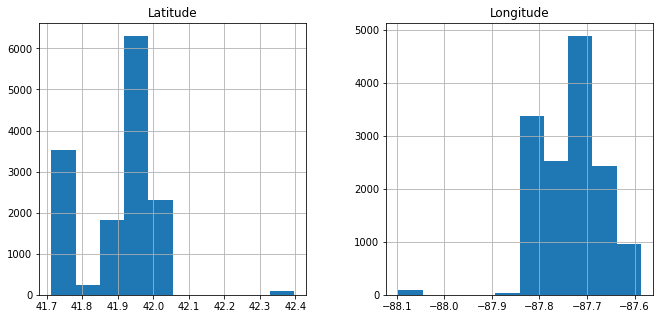

In [25]:
spray.hist(figsize=(11,5))
plt.subplots_adjust(hspace=0.5);

In [26]:
spray.dropna(inplace=True)

In [27]:
spray.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13710 entries, 0 to 14834
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       13710 non-null  object 
 1   Time       13710 non-null  object 
 2   Latitude   13710 non-null  float64
 3   Longitude  13710 non-null  float64
 4   Date_Time  13710 non-null  object 
 5   Lat_Lon    13710 non-null  object 
dtypes: float64(2), object(4)
memory usage: 749.8+ KB


C:\Users\mayra\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


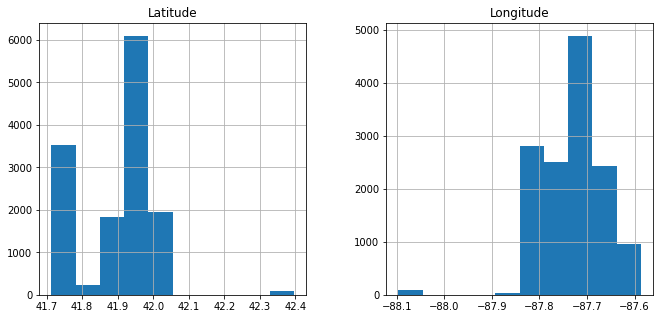

In [28]:
spray.hist(figsize=(11,5))
plt.subplots_adjust(hspace=0.5);

In [29]:
missing = pd.concat([spray.isnull().sum(), 100 * spray.isnull().mean()], axis=1)
header = missing.columns=['count', '%']
missing.sort_values(by=header, ascending=False)

,count,%
Date,0,0.0
Time,0,0.0
Latitude,0,0.0
Longitude,0,0.0
Date_Time,0,0.0
Lat_Lon,0,0.0


Summary of analysis on Spray data file:

Noticed there were 584 values that were null, which make-up 4% of the data. Also found there were 541 duplicates. All of these finding related to the same date, which made me question the data for that day. I'm certain that dropping the duplicates was correct, and made a choice to drop the null values (due to uncertainty of the validity of the data for that day).

WEATHER DATA FILE EXPLORATION:

In [30]:
weather = pd.read_csv('weather.csv')
weather

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,2,2014-10-29,49,40,45,M,34,42,20,0,...,,M,M,M,0.00,29.42,30.07,8.5,29,9.0
2940,1,2014-10-30,51,32,42,-4,34,40,23,0,...,,0,M,0.0,0.00,29.34,30.09,5.1,24,5.5
2941,2,2014-10-30,53,37,45,M,35,42,20,0,...,RA,M,M,M,T,29.41,30.10,5.9,23,6.5
2942,1,2014-10-31,47,33,40,-6,25,33,25,0,...,RA SN,0,M,0.1,0.03,29.49,30.20,22.6,34,22.9


In [31]:
weather.sort_values(by='WetBulb',ascending=False)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
2410,1,2013-08-10,81,64,73,0,57,M,0,8,...,,0,M,0.0,0.00,M,30.08,5.3,5,6.5
2412,1,2013-08-11,81,60,71,-2,61,M,0,6,...,RA,0,M,0.0,0.01,29.35,30.07,2.0,27,3.0
848,1,2009-06-26,86,69,78,7,60,M,0,13,...,,0,M,0.0,0.00,M,29.85,6.4,4,8.2
2415,2,2013-08-12,85,69,77,M,63,M,0,12,...,RA,M,M,M,0.66,29.27,29.92,4.5,26,7.7
1628,1,2011-07-18,92,80,86,12,75,78,0,21,...,RA HZ,0,M,0.0,0.01,29.23,29.96,10.6,25,10.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,1,2008-10-28,45,31,38,-9,23,33,27,0,...,,0,M,0.0,0.00,29.54,30.29,10.5,30,10.9
729,2,2008-10-28,45,32,39,M,23,33,26,0,...,,M,M,M,0.00,29.60,30.31,9.9,30,10.3
1063,2,2009-10-11,45,29,37,M,23,33,28,0,...,,M,M,M,0.00,29.67,30.36,1.1,1,4.8
2942,1,2014-10-31,47,33,40,-6,25,33,25,0,...,RA SN,0,M,0.1,0.03,29.49,30.20,22.6,34,22.9


It looks like there are some columns that contain 'M' that probably shouldn't. However, I am not certain on that. I ready the Data Overview on Kaggle to see if 'M' represented anything and wasn't able to find anything. However, there seem to be quite a few cells with'M' and, aside from the average column, not sure how to handle the rest. 

C:\Users\mayra\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


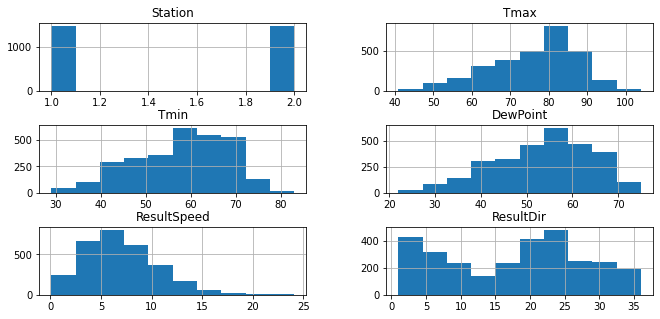

In [32]:
weather.hist(figsize=(11,5))
plt.subplots_adjust(hspace=0.5);

In [33]:
weather.duplicated().value_counts()

False    2944
dtype: int64

Summary of analysis on Weather data file:

The 'weather' dataset didn't appear to have duplicates or null values. However, it does have a lot of 'M' values where, perhaps, it shouldn't. Need guidance on how to handle.